# Image Processing SS 18 - Assignment - 08

### Deadline is 13.6.2016 at 08:00 o'clock

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [7]:
# display the plots inside the notebook
%matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.io.wavfile
from skimage.data import astronaut
from skimage.color import rgb2gray

from __future__ import division
import random
try:
    from StringIO import StringIO as BytesIO
except ImportError:
    from io import BytesIO
    
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
    
    
from numpy.fft import fft2 as numpy_fft2, ifft2 as numpy_ifft2

from PIL import Image
import itertools
import IPython

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 1 - 2D DCT - 5 Points

Transformieren eines Bildes mit der 2D DCT (Diskrete
Kosinustransformation), die Sie implementieren sollen unter Verwendung
der DFT (Diskreten Fouriertransformation). Die Funktion für DFT von
Python darf verwendet werden, nicht jedoch die DCT von Python. 

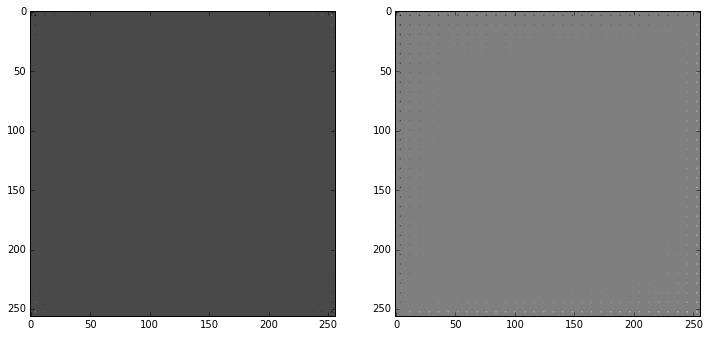

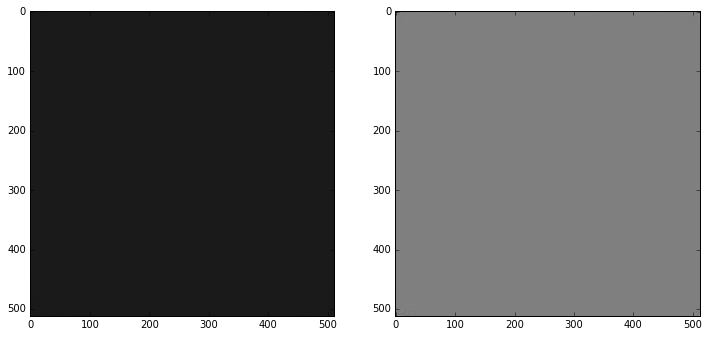

In [21]:
def dct2d(img):
    """
    Returns the 2d discrete cosine transformation
    """
    # your code here
    return numpy_fft2(img)


def inv_dct2d(x):
    """
    Returns the 2d inverse discrete cosine transformation
    """
    # your code here
    return numpy_ifft2(x)


def chess_board(n=8, field_size=32):
    board = np.zeros((n*field_size, n*field_size))
    s = field_size
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i*s:(i+1)*s, j*s:(j+1)*s] = 1
    return board



for pic in [chess_board(), rgb2gray(astronaut())/255]:
    plt.subplot(121)
    plt.imshow(np.real(dct2d(pic)), cmap='gray')
    plt.subplot(122)
    plt.imshow(np.imag(dct2d(pic)), cmap='gray')
    plt.show()



# Exercise 2 - High and Low Pass filter with the 2D DCT - 5 Points

Schreiben Sie eine Funktion für einen Hochpass und einen
Tiefpassfilter, welcher auf dem Frequenzspektrum eines
2D-DCT-Transformierten Bildes arbeitet. Wenden Sie diese Hoch- und
Tiefpassfilterfunktion jeweils auf den Frequenzspekten der Bilder
Schachbrett und Astronaut an und transformieren Sie die resultierenden
Spektren wieder zurück in den Bildraum.

Zeigen Sie die Spektren der Bilder vor und nach der Hoch- und
Tiefpassfilterung an sowie die Ergebnisbilder nach der
Rücktransformation in den Bildraum.

In [25]:
def high_pass(img_ft, n):
    """Removes the low frequencies"""
    ft = img_ft.copy()
    return ft

def low_pass(img_ft, n):
    """Removes the high frequencies"""
    # your code here
    return img_ft
    
    
def inv_dct_and_plot(img_ft):
    plt.imshow(np.real(inv_dct2d(img_ft)), cmap='gray')
    plt.show()
    
    

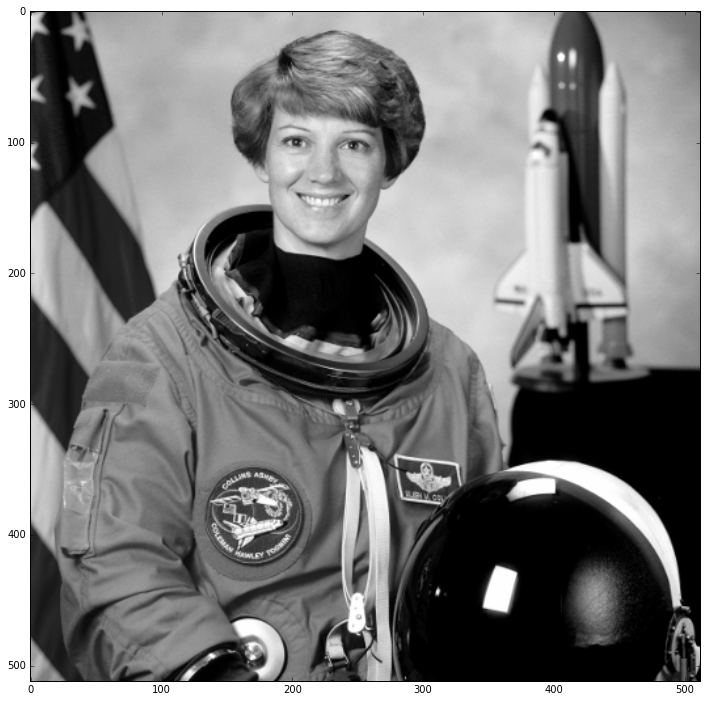

In [27]:
img = rgb2gray(astronaut() / 255)
# remove the low frequiencies
astro_high_feq = high_pass(dct2d(img), 12)
inv_dct_and_plot(astro_high_feq)

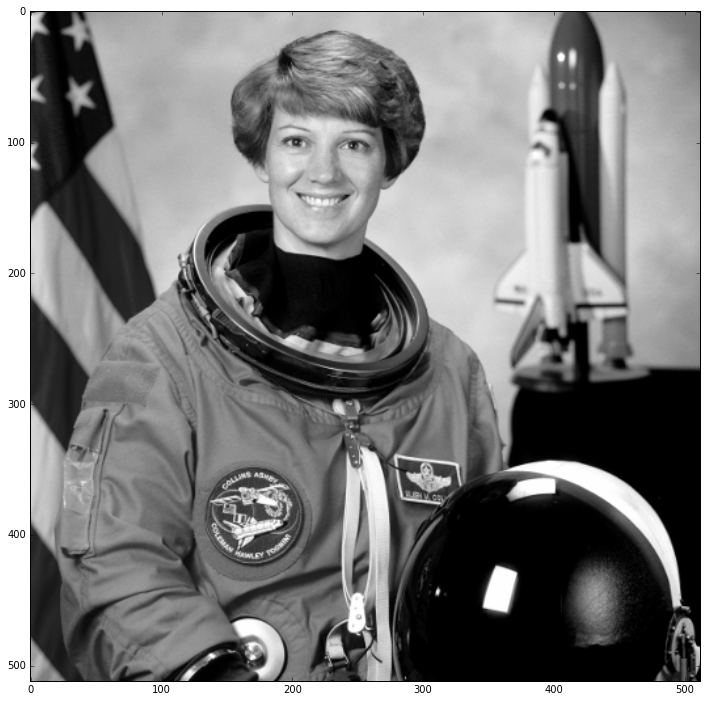

In [29]:
# remove the high frequiencies
astro_low_feq = low_pass(dct2d(img), 12)
inv_dct_and_plot(astro_low_feq)